In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

from datetime import datetime


In [2]:
# Load the data
df = pd.read_csv('US-pumpkins.csv')


columns_to_select = ['City Name','Package','Variety', 'Origin','Item Size', 'Color']
pumpkins = df.loc[:, columns_to_select]

pumpkins.dropna(inplace=True)

In [3]:
# Inspect the data
pumpkins.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 991 entries, 2 to 1698
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   City Name  991 non-null    object
 1   Package    991 non-null    object
 2   Variety    991 non-null    object
 3   Origin     991 non-null    object
 4   Item Size  991 non-null    object
 5   Color      991 non-null    object
dtypes: object(6)
memory usage: 54.2+ KB


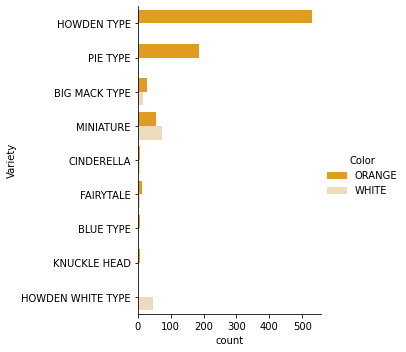

In [4]:
# Set a palette to match the pumpkin colors so Orange is orange and White is white
pumpkin_palette = {'ORANGE':'orange', 'WHITE':'wheat'}

# Use seaborn to make a categorical plot to understand the distribution of Variety and Color
sns.catplot(y='Variety', hue='Color', kind='count', palette=pumpkin_palette, data=pumpkins)


In [5]:
from sklearn.preprocessing import OrdinalEncoder

item_size_categories = [['sml', 'med', 'med-lge', 'lge', 'xlge', 'jbo', 'exjbo']]
ordinal_features = ['Item Size']
ordinal_encoder = OrdinalEncoder(categories=item_size_categories)

In [6]:
from sklearn.preprocessing import OneHotEncoder

categorical_features = ['City Name', 'Package', 'Variety', 'Origin']
categorical_encoder = OneHotEncoder(sparse_output=False)

In [7]:
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer(transformers=[
    ('ord', ordinal_encoder, ordinal_features),
    ('cat', categorical_encoder, categorical_features)
    ])

ct.set_output(transform='pandas')
encoded_features = ct.fit_transform(pumpkins)

In [8]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
encoded_label = label_encoder.fit_transform(pumpkins['Color'])

In [9]:
encoded_pumpkins = encoded_features.assign(Color=encoded_label)
encoded_pumpkins.head()

,ord__Item Size,cat__City Name_ATLANTA,cat__City Name_BALTIMORE,cat__City Name_BOSTON,cat__City Name_CHICAGO,cat__City Name_COLUMBIA,cat__City Name_DALLAS,cat__City Name_DETROIT,cat__City Name_LOS ANGELES,cat__City Name_MIAMI,...,cat__Origin_NEW JERSEY,cat__Origin_NEW YORK,cat__Origin_NORTH CAROLINA,cat__Origin_OHIO,cat__Origin_PENNSYLVANIA,cat__Origin_TENNESSEE,cat__Origin_TEXAS,cat__Origin_VERMONT,cat__Origin_VIRGINIA,Color
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
4,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
5,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
6,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


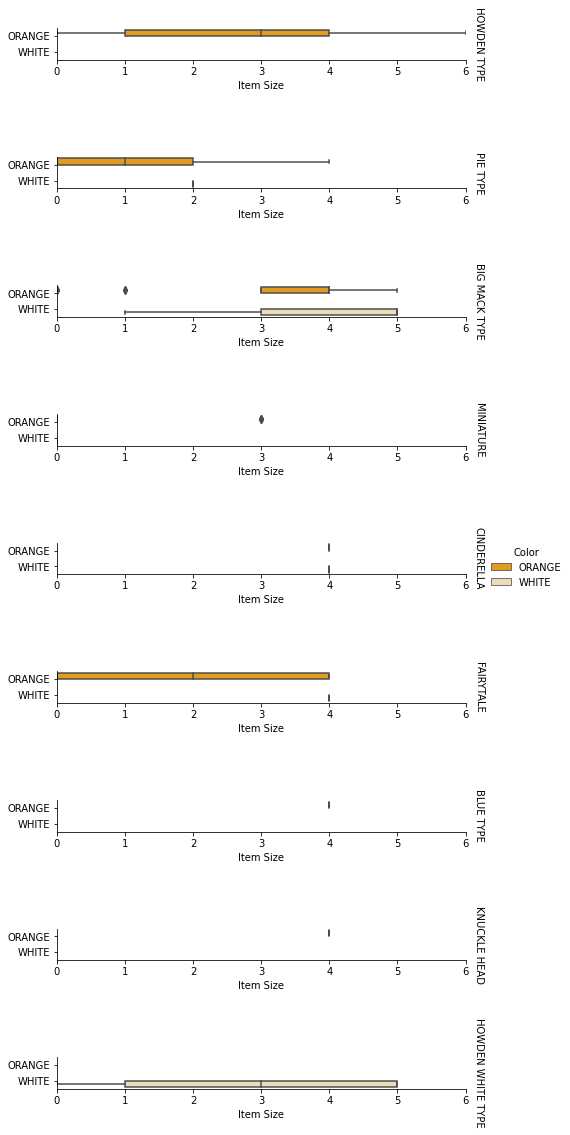

In [10]:
# Change the Item Size column in pumpkins to the ord__Item Size column in encoded_pumpkins
pumpkins['Item Size'] = encoded_pumpkins['ord__Item Size']

# Using the same palette as above, make a categorical box pot to visualize the relationships between
# the encoded Item size and the unencoded Variety and Color columns of the data
g = sns.catplot(x='Item Size', y='Color', row='Variety', hue='Color', kind='box', orient='h', palette=pumpkin_palette, data=pumpkins,
            sharex=False, margin_titles=True, height=1.8, aspect=4)

g.set(xlabel="Item Size", ylabel="").set(xlim=(0,6))
g.set_titles(row_template="{row_name}")

In [13]:
# Create a palette dictionary with keys 0 and 1 to match the above defined palette
new_palette = {'0':'orange', '1':'wheat'}

/var/folders/h_/rngh_9yd6hddnq52jkvj6t940000gn/T/ipykernel_943/3579722181.py:3: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.swarmplot(x='Color', y='ord__Item Size', palette=new_palette, data=encoded_pumpkins)
/Users/alexwurm/.pyenv/versions/3.10.3/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 64.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/alexwurm/.pyenv/versions/3.10.3/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 23.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Color', ylabel='ord__Item Size'>

/Users/alexwurm/.pyenv/versions/3.10.3/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 80.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/alexwurm/.pyenv/versions/3.10.3/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 37.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


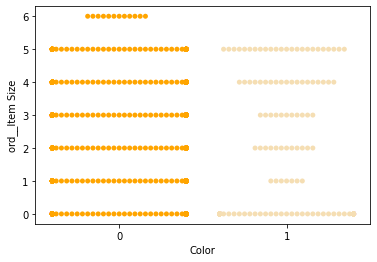

In [14]:

# Create a new swarm plot with the same color palette to visualize the relationship between Color and ord__Item Size
# Make Color the independent variable and ord__Item Size the dependent variable and use encode_pumpkins as the data
sns.swarmplot(x='Color', y='ord__Item Size', palette=new_palette, data=encoded_pumpkins)

In [15]:
# Use sklearn with encoded_pumpkins as the data to create a logistic regression model.
# Print a classification report, the predicted labels, and the f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

X = encoded_pumpkins.drop('Color', axis=1)
y = encoded_pumpkins['Color']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

print(classification_report(y_test, y_pred))
print(y_pred)
print(f1_score(y_test, y_pred, average='weighted'))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94       245
           1       0.79      0.64      0.71        53

    accuracy                           0.91       298
   macro avg       0.86      0.80      0.83       298
weighted avg       0.90      0.91      0.90       298

[0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 0
 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0]
0.902086129753915


In [16]:
# Create a confusion matrix using sklearn and the predicted labels from the logistic regression model
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[236,   9],
       [ 19,  34]])

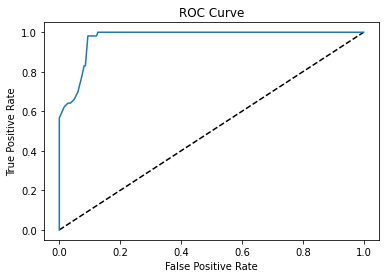

In [17]:
# Create an ROC curve using sklearn and the predicted labels from the logistic regression model and plot inline
from sklearn.metrics import roc_curve

y_pred_prob = logreg.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [18]:
# Calculate the area under the ROC curve using sklearn and print the result
from sklearn.metrics import roc_auc_score

print(roc_auc_score(y_test, y_pred_prob))


0.9708509819021949
